<a href="https://colab.research.google.com/github/PrashantBanjare/abc-f/blob/main/Prashant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('FastagFraudDetection.csv')

In [ ]:
df.head(100)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4/11/2023 15:50,Van,FTG-095-LMK-211,B-102,Regular,Medium,140,90,"13.059816123454882, 77.77068662374292",97,KA89UV4567,Fraud
96,97,4/12/2023 20:25,Sedan,FTG-077-PLN-983,A-101,Express,Medium,160,160,"13.059816123454882, 77.77068662374292",46,KA92WX8901,Not Fraud
97,98,4/13/2023 1:00,SUV,FTG-088-VFR-652,B-102,Regular,Large,180,0,"13.059816123454882, 77.77068662374292",81,KA95YZ2345,Fraud
98,99,4/14/2023 6:40,Bus,FTG-079-RSX-321,C-103,Express,Large,350,100,"13.059816123454882, 77.77068662374292",64,KA98AB6789,Fraud


In [ ]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
df.select_dtypes('number').mean()

Transaction_ID        2500.5000
Transaction_Amount     161.0620
Amount_paid            141.2610
Vehicle_Speed           67.8512
dtype: float64

In [ ]:
df.select_dtypes('number').median()

Transaction_ID        2500.5
Transaction_Amount     130.0
Amount_paid            120.0
Vehicle_Speed           67.0
dtype: float64

In [ ]:
df.select_dtypes('number').mode().iloc[0]

Transaction_ID         1.0
Transaction_Amount     0.0
Amount_paid            0.0
Vehicle_Speed         55.0
Name: 0, dtype: float64

In [ ]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
df['FastagID']=df['FastagID'].fillna(df['FastagID'].mode()[0])

In [ ]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               5000 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,FTG-000-QAZ-210,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


# **Data Visualization**

**Visualize the distribution of the target variable**


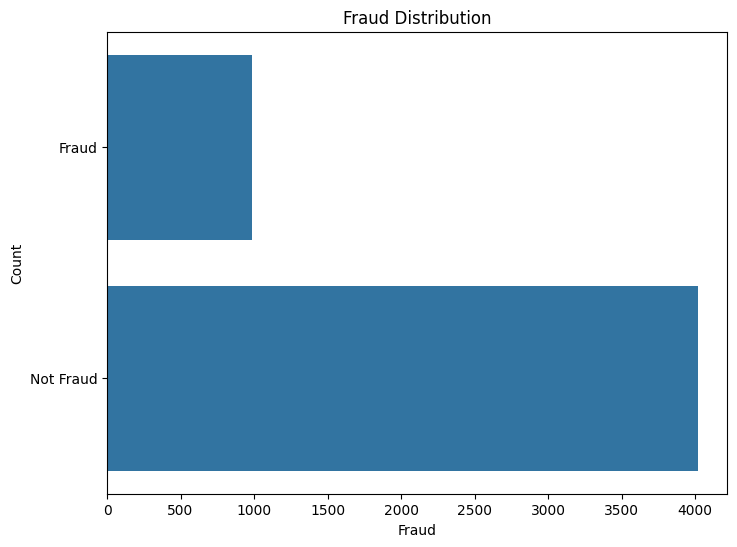

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(df['Fraud_indicator'])
plt.title('Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

**Visualize the distribution of Transaction Amounts**

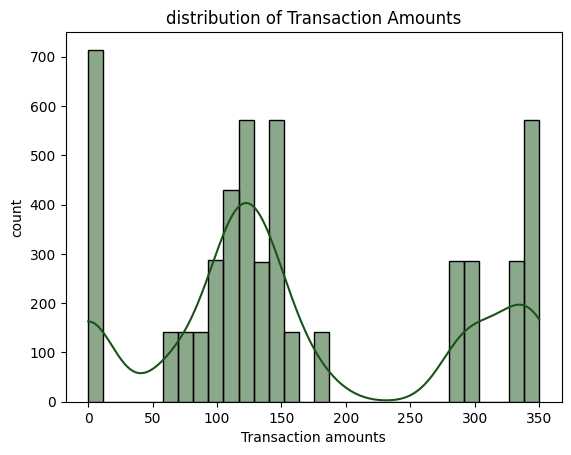

In [ ]:
sns.histplot(df['Transaction_Amount'],bins=30,kde=True,color='#1A5319')
plt.title('distribution of Transaction Amounts')
plt.xlabel('Transaction amounts')
plt.ylabel('count')
plt.show()

**Visualize the distribution of Amount Paid**

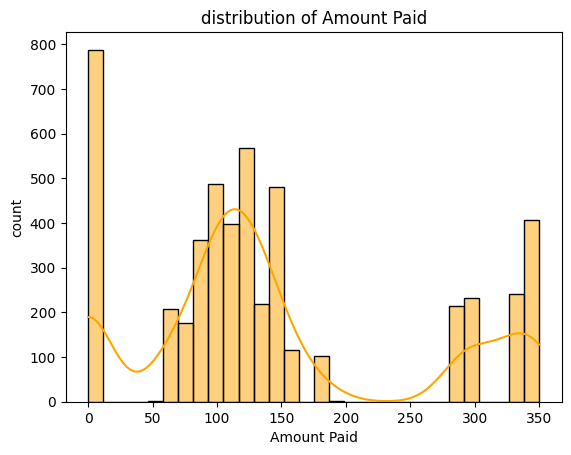

In [ ]:
sns.histplot(df['Amount_paid'],bins=30,kde=True,color='orange')
plt.title('distribution of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('count')
plt.show()

**Visualize the distribution of Vehicle Speed**

Text(0, 0.5, 'Frequency')

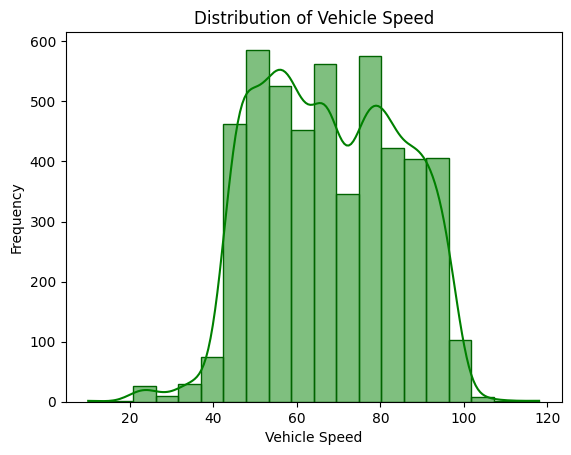

In [ ]:
sns.histplot(df['Vehicle_Speed'], bins=20, kde=True,color='green',edgecolor ='darkgreen' )
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('Frequency')

Visualize the relationship between Transaction Amount and
Amount Paid

Text(0.5, 1.0, 'Transaction Amount vs Amount Paid')

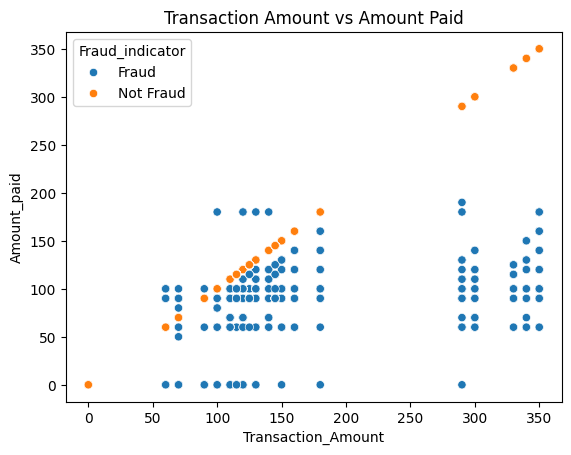

In [ ]:
sns.scatterplot(x='Transaction_Amount',y = 'Amount_paid',hue ='Fraud_indicator',data=df)
plt.title('Transaction Amount vs Amount Paid')

**Countplots for Vehicle Type variables by fraud indicator**

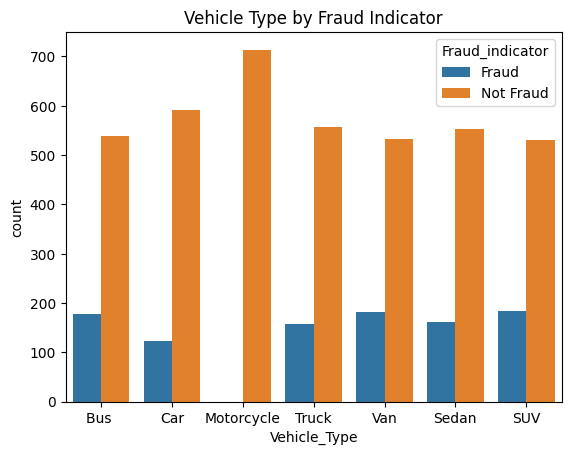

In [ ]:
sns.countplot(x='Vehicle_Type', hue='Fraud_indicator', data=df)
plt.title('Vehicle Type by Fraud Indicator')
plt.show()

**Countplots for Lane type variables by fraud indicator**

Text(0.5, 1.0, 'Lane Type by Fraud Indicator')

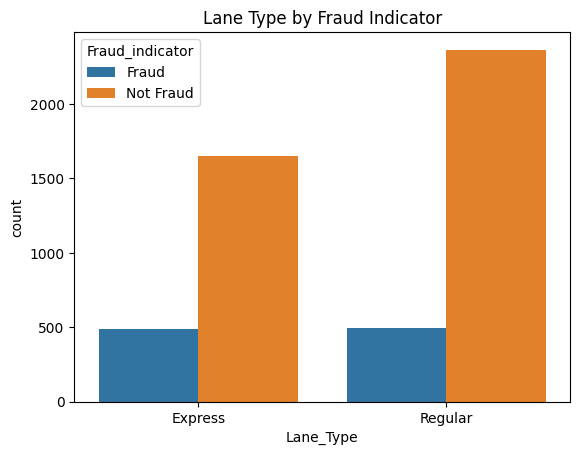

In [ ]:
sns.countplot(x='Lane_Type', hue='Fraud_indicator', data=df)
plt.title('Lane Type by Fraud Indicator')

**Countplots for Geographical Location variables by fraud indicator**

Text(0.5, 1.0, 'Geographical Location by Fraud Indicator')

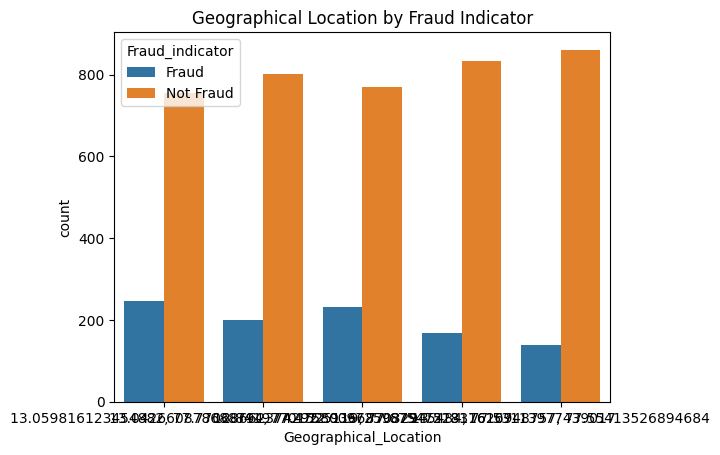

In [ ]:
sns.countplot(x='Geographical_Location', hue='Fraud_indicator', data=df)
plt.title('Geographical Location by Fraud Indicator')

**check the Pairplot**

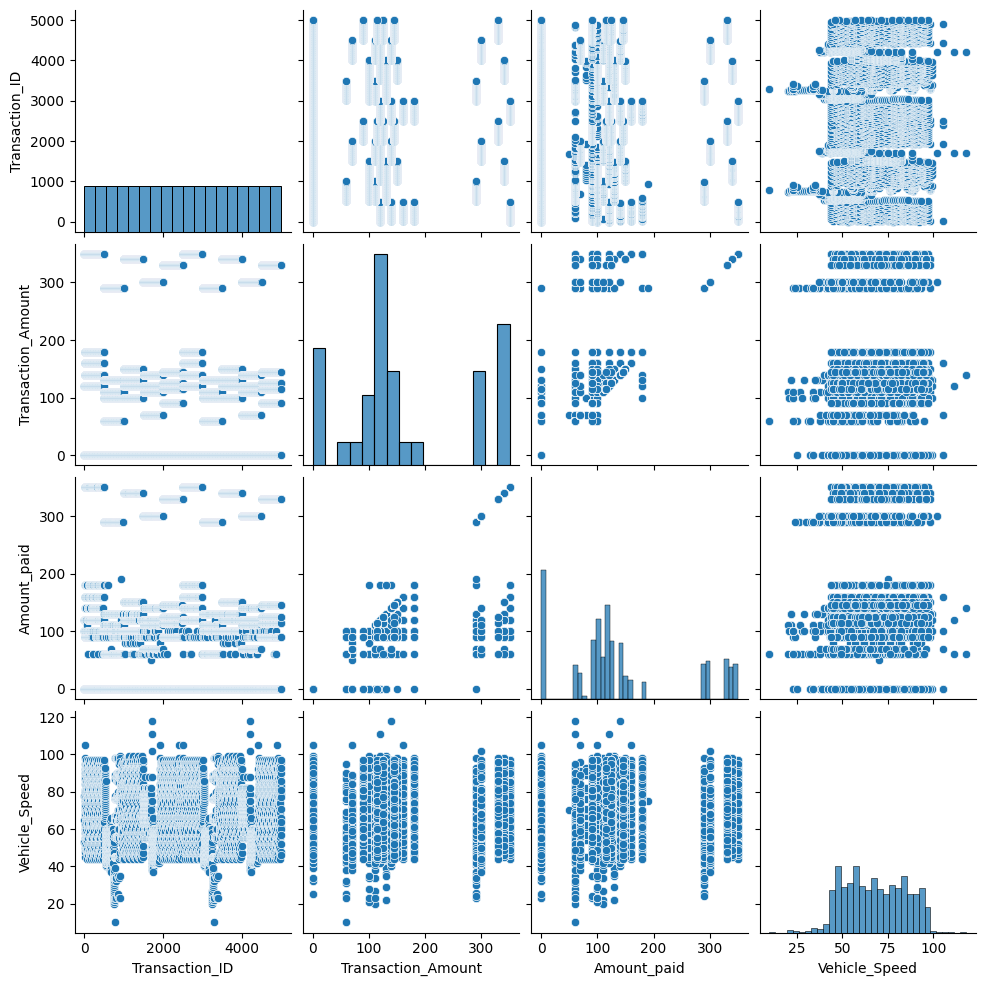

In [ ]:
sns.pairplot(df)

**Heat Map**

In [ ]:
df1=df.select_dtypes('number')
df1

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
0,1,350,120,65
1,2,120,100,78
2,3,0,0,53
3,4,350,120,92
4,5,140,100,60
...,...,...,...,...
4995,4996,330,330,81
4996,4997,125,125,64
4997,4998,115,115,93
4998,4999,145,145,57


<Axes: >

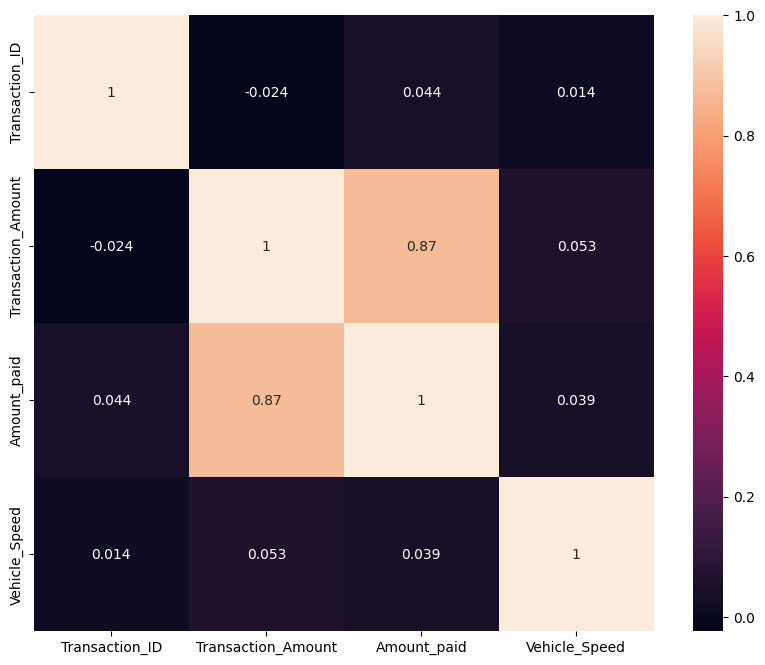

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot = True)

**Label Encoding for Categorical Features: Ensure that categorical
features are encoded.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions','Geographical_Location',
               'Vehicle_Plate_Number','Fraud_indicator','FastagID','TollBoothID',]:
      le=LabelEncoder()
      df[column] = le.fit_transform(df[column])
      label_encoders[column] = le
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,0,2,0,0,0,350,120,3,65,1482,0
1,2,1/7/2023 14:55,1,9,1,1,2,120,100,3,78,3066,0
2,3,1/8/2023 18:25,2,0,3,1,2,0,0,3,53,3663,1
3,4,1/9/2023 2:05,5,241,2,1,0,350,120,3,92,1498,0
4,5,1/10/2023 6:35,6,2860,1,0,1,140,100,3,60,2409,0


 **Feature Extraction: Additional time-based features (Hour,
Day, Month, Weekday) have been extracted from the Timestamp.**

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.weekday
df.sample(10)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
4121,4122,2023-05-02 21:20:00,6,1241,1,1,1,120,120,1,70,4491,1,21,2,5,1
4948,4949,2023-10-29 15:35:00,4,2377,0,0,1,115,115,4,69,296,1,15,29,10,6
2615,2616,2023-10-09 15:15:00,5,756,2,1,0,350,350,3,79,1761,1,15,9,10,0
966,967,2023-10-25 10:23:00,0,3933,2,0,0,290,130,2,66,4313,0,10,25,10,2
4580,4581,2023-08-22 00:49:00,1,203,0,0,2,90,90,4,55,4943,1,0,22,8,1
1713,1714,2023-08-28 01:45:00,4,3266,0,1,1,110,110,1,75,2168,1,1,28,8,0
2591,2592,2023-11-13 20:05:00,0,489,2,1,0,350,350,3,77,2200,1,20,13,11,0
2342,2343,2023-10-11 11:15:00,6,1867,1,0,1,125,125,4,49,624,1,11,11,10,2
1130,1131,2023-06-17 03:00:00,5,4388,2,0,0,340,340,0,50,1672,1,3,17,6,5
2587,2588,2023-09-06 06:24:00,5,346,2,1,0,350,350,3,79,3449,1,6,6,9,2


In [ ]:
df.drop(columns=['Timestamp'],inplace=True)

**Model Training: Train a variety of machine learning models (e.g., Logistic
Regression, Random Forest, Gradient Boosting).**

**Model Evaluation: Evaluate model performance using metrics such as
precision, recall, F1 score, and accuracy.**

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix


In [ ]:
x=df.drop(columns=['Fraud_indicator'])
y=df['Fraud_indicator']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
random_state=42)
x_train, x_test, y_train, y_test

(      Transaction_ID  Vehicle_Type  FastagID  TollBoothID  Lane_Type  \
 4227            4228             4       155            0          1   
 4676            4677             3      1028            1          0   
 800              801             2         0            5          1   
 3671            3672             2         0            5          1   
 4193            4194             3      1369            1          1   
 ...              ...           ...       ...          ...        ...   
 4426            4427             1      2434            0          0   
 466              467             6      3232            1          0   
 3092            3093             6      3449            1          0   
 3772            3773             4       716            0          0   
 860              861             3      3585            1          0   
 
       Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
 4227                   1                 110          110  

**Logistic Regression Model**

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print("Logistic Regression Model Results:")
print("Accuracy:", accuracy)
print('confusion Matrix :',conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Logistic Regression Model Results:
Accuracy: 0.983
confusion Matrix : [[200  17]
 [  0 783]]
Precision: 0.97875
Recall: 1.0
F1 Score: 0.9892608970309539


**Decision tree classification**

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1=model.predict(x_test)

In [ ]:
accuracy1=accuracy_score(y_test,y_pred1)
conf_matrix1 = confusion_matrix(y_test,y_pred1)
precision1 = precision_score(y_test,y_pred1)
recall1 = recall_score(y_test,y_pred1)
f11 = f1_score(y_test,y_pred1)

print("Decision Tree Classification Model Results:")
print("Accuracy:", accuracy1)
print('confusion Matrix :',conf_matrix1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Decision Tree Classification Model Results:
Accuracy: 0.983
confusion Matrix : [[204  13]
 [  4 779]]
Precision: 0.9835858585858586
Recall: 0.9948914431673053
F1 Score: 0.9892063492063492


In [ ]:
model.score(x_test,y_test)

0.983

**Random Forest**

In [ ]:
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2 = model2.predict(x_test)

In [ ]:
accuracy2 = accuracy_score(y_test,y_pred2)
conf_matrix2 = confusion_matrix(y_test,y_pred2)
precision2 = precision_score(y_test,y_pred2)
recall2 = recall_score(y_test,y_pred2)
f12 = f1_score(y_test,y_pred2)
print("Random Forest Classification Model Results:")
print("Accuracy:", accuracy2)
print('confusion Matrix :',conf_matrix2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)

Random Forest Classification Model Results:
Accuracy: 0.971
confusion Matrix : [[188  29]
 [  0 783]]
Precision: 0.9642857142857143
Recall: 1.0
F1 Score: 0.9818181818181818


**Here are the accuracy scores for different machine learning
models**

Logistic Regression: 98.3%                                   
Decision Tree: 98.4%                                         
Random Forest: 97.6%

([0, 1, 2],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest')])

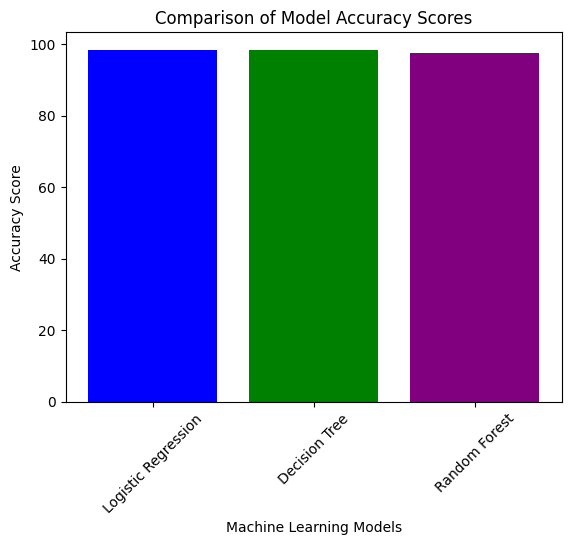

In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [98.3, 98.4, 97.6]
colors = ['blue', 'green', 'purple']
plt.bar(model_names, accuracies,color=colors)
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability if needed


In [ ]:
import pickle


In [ ]:

filename = 'FastadFraud_model.pkl'
pickle.dump(model2, open(filename, 'wb'))


In [ ]:
print('numpy',np.__version__)
print('pandas',pd.__version__)

print('seaborn',sns.__version__)
print('sklearn',sklearn.__version__)


numpy 1.25.2
pandas 2.0.3
seaborn 0.13.1
sklearn 1.2.2


In [ ]:
# prompt: create a web application  for this model


# Necessary imports
from flask import Flask, request, render_template
import pickle
import pandas as pd

# Load the trained model
filename = 'FastadFraud_model.pkl'  # Replace with your actual filename
model = pickle.load(open(filename, 'rb'))

# Initialize Flask app
app = Flask(__name__, template_folder='templates')  # Assuming you have a 'templates' folder

# Define the route for the home page
@app.route('/', methods=['GET', 'POST'])
def home():
    if request.method == 'POST':
        # Get input data from the form
        # (Adjust field names to match your form)
        vehicle_type = request.form['vehicle_type']
        lane_type = request.form['lane_type']
        # ... get other features similarly ...

        # Preprocess input data (similar to how you did during training)
        # ... (e.g., label encoding, feature scaling, etc.) ...

        # Create a DataFrame from the input data
        input_data = pd.DataFrame({
            'Vehicle_Type': [vehicle_type],
            'Lane_Type': [lane_type],
            # ... other features ...
        })

        # Make prediction
        prediction = model.predict(input_data)[0]

        # Render the result template with the prediction
        return render_template('result.html', prediction=prediction)

    # If it's a GET request, just render the input form
    return render_template('index.html')

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


**SUMMARY**

---


  Decision Tree stands out as the top model, followed closely by Logistic
Regression. Random Forest also shows strong performance.